<a href="https://colab.research.google.com/github/rmahesh6386/DataScience_Python/blob/main/Assignment_11_Random__Forest_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
CD = pd.read_csv("Company_Data.csv")
CD.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
CD.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [7]:
CD.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
CD.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [9]:
CD.shape

(400, 11)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


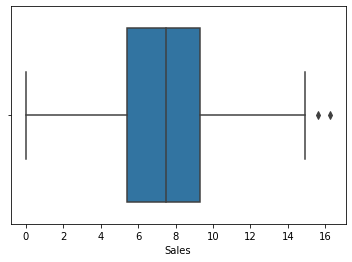

In [10]:
sns.boxplot(CD['Sales'])

there are oultiers in the sales data

In [11]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


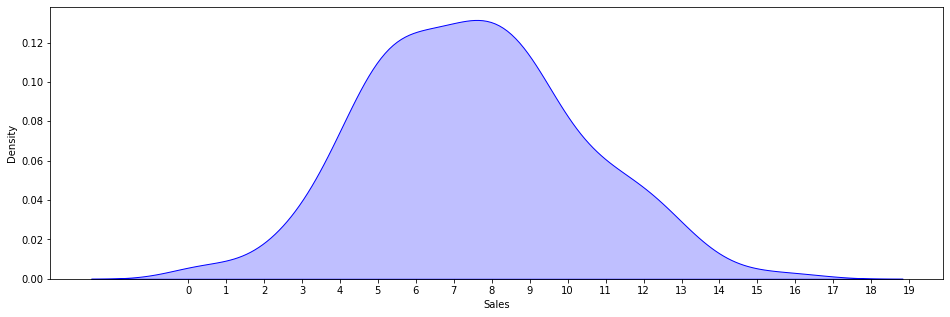

In [12]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(CD['Sales'].skew()))
print("Kurtosis: {}".format(CD['Sales'].kurtosis()))
ax = sns.kdeplot(CD['Sales'],shade=True,color='b')
plt.xticks([i for i in range(0,20,1)])
plt.show()

The data is Skewed on the right

The data has negative Kurtosis,which means the distribution has more values in the tails compared to a normal distribution.

In [13]:
#first convert sales into categorical variable
CD['Sales_Rating'] = pd.cut(CD.Sales,bins=[0,3,6,10,14,20],
                                      labels=['Bad','Below_Avg','Avg','Good','Excellent'],include_lowest=True)

In [14]:
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
CD1 = CD[['ShelveLoc', 'Urban','US']].apply(label.fit_transform)
CD1 = CD1.rename(columns={'ShelveLoc':'ShelveLoc_num','Urban':'Urban_num','US':'US_num'})
CD1.head()

,ShelveLoc_num,Urban_num,US_num
0,0,1,1
1,1,1,1
2,2,1,1
3,2,1,1
4,0,1,0


In [15]:
CD = pd.concat([CD,CD1], axis=1, sort=False)
CD.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Rating,ShelveLoc_num,Urban_num,US_num
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Avg,0,1,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Good,1,1,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Good,2,1,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Avg,2,1,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Below_Avg,0,1,0


In [16]:
corr = CD.corr()

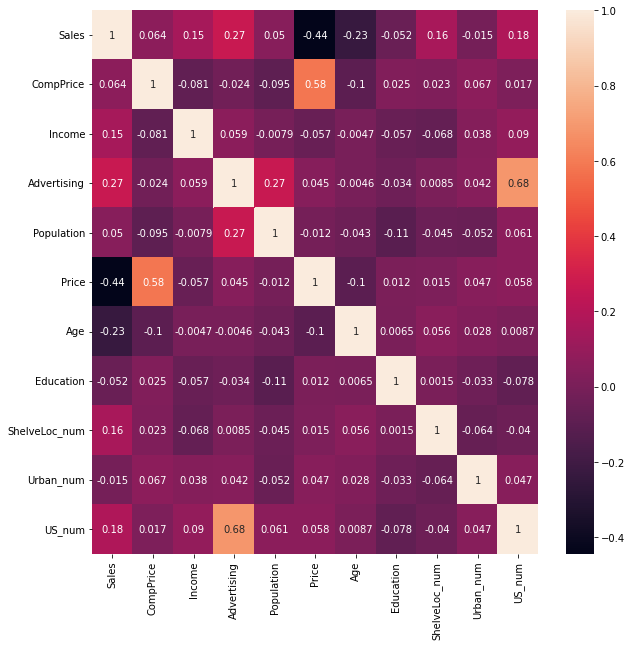

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [18]:
CD =CD.drop(columns={'Sales','ShelveLoc','Urban','US'},axis=1)

CD = CD[["CompPrice","Income","Advertising","Population","Price","Age",
                             "Education","Urban_num","US_num","ShelveLoc_num","Sales_Rating"]]


CD.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_num,US_num,ShelveLoc_num,Sales_Rating
0,138,73,11,276,120,42,17,1,1,0,Avg
1,111,48,16,260,83,65,10,1,1,1,Good
2,113,35,10,269,80,59,12,1,1,2,Good
3,117,100,4,466,97,55,14,1,1,2,Avg
4,141,64,3,340,128,38,13,1,0,0,Below_Avg


In [19]:
colnames=list(CD.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Urban_num',
 'US_num',
 'ShelveLoc_num',
 'Sales_Rating']

In [20]:
x=CD.iloc[:,0:10]
y=CD['Sales_Rating']

In [21]:
x.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_num,US_num,ShelveLoc_num
0,138,73,11,276,120,42,17,1,1,0
1,111,48,16,260,83,65,10,1,1,1
2,113,35,10,269,80,59,12,1,1,2
3,117,100,4,466,97,55,14,1,1,2
4,141,64,3,340,128,38,13,1,0,0


In [22]:
y

0            Avg
1           Good
2           Good
3            Avg
4      Below_Avg
         ...    
395         Good
396          Avg
397          Avg
398    Below_Avg
399          Avg
Name: Sales_Rating, Length: 400, dtype: category
Categories (5, object): ['Bad' < 'Below_Avg' < 'Avg' < 'Good' < 'Excellent']

In [23]:
CD.isnull().any()

CompPrice        False
Income           False
Advertising      False
Population       False
Price            False
Age              False
Education        False
Urban_num        False
US_num           False
ShelveLoc_num    False
Sales_Rating     False
dtype: bool

In [34]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=150,max_features=4,criterion ='entropy')
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.6174999999999999


In [35]:
model.fit(x,y)
CD['pred'] = model.predict(x)
cols = ['pred','Sales_Rating']
CD[cols].head()

,pred,Sales_Rating
0,Avg,Avg
1,Good,Good
2,Good,Good
3,Avg,Avg
4,Below_Avg,Below_Avg


In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(CD["Sales_Rating"],model.predict(x)) # Confusion matrix

pd.crosstab(CD["Sales_Rating"],CD["pred"])

pred,Avg,Bad,Below_Avg,Excellent,Good
Sales_Rating,,,,,
Bad,0,17,0,0,0
Below_Avg,0,0,113,0,0
Avg,192,0,0,0,0
Good,0,0,0,0,74
Excellent,0,0,0,4,0


In [39]:
##Accuracy on test data
from sklearn.metrics import accuracy_score
accuracy_test = accuracy_score(y,CD["pred"])
accuracy_test

1.0